## SVM & Naive Bayes

1) What is a Support Vector Machine (SVM) ?

->


A Support Vector Machine (SVM) is a supervised learning algorithm for classification and regression that finds a decision boundary (hyperplane) which separates classes by **maximizing the margin** — the distance between the hyperplane and the nearest training points from any class. SVMs can work linearly in input space or nonlinearly using kernel functions that implicitly map data into higher-dimensional feature spaces.



2) What is the difference between Hard Margin and Soft Margin SVM ?

->


- **Hard Margin SVM:** assumes perfect linear separability and enforces strict constraints  
  $$y_i(w\cdot x_i + b)\ge 1,\quad\forall i.$$  
  No training errors allowed. Sensitive to outliers.  
- **Soft Margin SVM:** allows misclassifications via slack variables \(\xi_i\ge0\) and penalty \(C\):  
  $$
  \begin{aligned}
  &\min_{w,b,\xi}\ \tfrac{1}{2}\lVert w\rVert^2 + C\sum_i \xi_i\\
  &\text{s.t. } y_i(w\cdot x_i + b) \ge 1 - \xi_i,\quad \xi_i\ge0.
  \end{aligned}
  $$  
  Trades off margin size vs. training errors (more robust to noise).



3) What is the mathematical intuition behind SVM ?

->


Choose the hyperplane that **maximizes the margin** between classes. For linear, hard-margin SVM the primal problem is:

$$
\begin{aligned}
&\min_{w,b}\ \tfrac{1}{2}\lVert w\rVert^2\\
&\text{s.t. } y_i(w\cdot x_i + b) \ge 1,\quad \forall i.
\end{aligned}
$$

For soft-margin add slack variables:

$$
\begin{aligned}
&\min_{w,b,\xi}\ \tfrac{1}{2}\lVert w\rVert^2 + C\sum_i \xi_i\\
&\text{s.t. } y_i(w\cdot x_i + b) \ge 1 - \xi_i,\quad \xi_i\ge0.
\end{aligned}
$$

The dual form (using Lagrange multipliers) expresses the solution via dot products of training points, so the classifier depends only on a subset of points (support vectors).



4) What is the role of Lagrange Multipliers in SVM ?

->


Lagrange multipliers \(\alpha_i\) convert the constrained primal problem into a dual optimization that is often easier to solve and allows kernels. The dual objective (linear kernel) is:

$$
\begin{aligned}
&\max_{\alpha}\ \sum_i \alpha_i - \tfrac{1}{2}\sum_{i}\sum_{j} \alpha_i\alpha_j y_i y_j (x_i\cdot x_j)\\
&\text{s.t. } 0\le \alpha_i \le C\ (\text{for soft margin}),\quad \sum_i \alpha_i y_i = 0.
\end{aligned}
$$

The decision function becomes:

$$
f(x)=\sum_i \alpha_i y_i (x_i\cdot x) + b,
$$

and only points with \(\alpha_i>0\) (support vectors) influence \(f(x)\). The dual lets us replace dot products with kernels \(K(x_i,x_j)\).



5) What are Support Vectors in SVM ?

->


Support vectors are training samples with non-zero Lagrange multipliers \(\alpha_i>0\). They lie on or inside the margin (or are misclassified in soft margin). These are the critical points that **define** the separating hyperplane; removing non-support vectors does not change the solution.



6) What is a Support Vector Classifier (SVC) ?

->


A Support Vector Classifier (SVC) is the SVM used for classification tasks. It finds the maximal-margin decision boundary (optionally in a kernel-induced feature space). In code libraries (e.g., `sklearn.svm.SVC`) it refers to the classification implementation supporting kernels, `C`, `gamma`, and multiclass strategies.



7) What is a Support Vector Regressor (SVR) ?

->


SVR applies SVM principles to regression. It fits a function \(f(x)=w\cdot\phi(x)+b\) such that deviations smaller than \(\varepsilon\) are ignored (ε-insensitive loss). Primal form:

$$
\begin{aligned}
&\min_{w,b,\xi,\xi^*}\ \tfrac{1}{2}\lVert w\rVert^2 + C\sum_i (\xi_i + \xi_i^*)\\
&\text{s.t. }
\begin{cases}
y_i - w\cdot\phi(x_i) - b \le \varepsilon + \xi_i,\\[4pt]
w\cdot\phi(x_i) + b - y_i \le \varepsilon + \xi_i^*,\\[4pt]
\xi_i,\xi_i^* \ge 0.
\end{cases}
\end{aligned}
$$

Like classification SVM, SVR has a dual and supports kernels.



8) What is the Kernel Trick in SVM ?

->


The kernel trick replaces explicit feature mapping \(\phi(x)\) by a kernel function:

$$
K(x_i,x_j) = \phi(x_i)\cdot\phi(x_j).
$$

Because the dual SVM only needs dot products, using \(K\) lets SVM operate in a high (or infinite) dimensional feature space implicitly and efficiently, enabling nonlinear decision boundaries without computing \(\phi(x)\) explicitly.



9) Compare Linear Kernel, Polynomial Kernel, and RBF Kernel

->


- **Linear Kernel:**  
  $$K(x,x') = x\cdot x'$$  
  Simple, fast, works well when data are (approximately) linearly separable or in very high dimensional sparse spaces (e.g., text).

- **Polynomial Kernel:**  
  $$K(x,x') = (\gamma\, x\cdot x' + r)^d$$  
  Captures polynomial feature interactions up to degree \(d\). Useful for global polynomial relationships; degree \(d\) controls complexity (risk of overfitting if large).

- **RBF (Gaussian) Kernel:**  
  $$K(x,x') = \exp\big(-\gamma \lVert x-x'\rVert^2\big)$$  
  Maps to an infinite-dimensional space and creates localized, flexible decision boundaries. Controlled by \(\gamma\) (kernel width) and \(C\). Often a strong default but can overfit if \(\gamma\) is large.

Trade-offs: linear = simple/fast; polynomial = global nonlinear interactions; RBF = flexible local decisions.



10) What is the effect of the C parameter in SVM ?

->


\(C\) controls the penalty on slack variables (misclassifications):

- **Large \(C\)** → strong penalty for errors → narrower margin, classifier focuses on reducing training errors (risk: overfitting).  
- **Small \(C\)** → weak penalty → wider margin, allows more errors (risk: underfitting).

In the soft-margin objective:

$$
\min_{w,b,\xi}\ \tfrac{1}{2}\lVert w\rVert^2 + C\sum_i \xi_i.
$$

\(C\) balances margin regularization vs. training error.



11) What is the role of the Gamma parameter in RBF Kernel SVM ?

->


In RBF kernel \(K(x,x')=\exp(-\gamma\lVert x-x'\rVert^2)\), \(\gamma\) sets the influence radius of training points:

- **Large \(\gamma\)** → narrow influence → high model complexity, localized decision boundaries, risk of overfitting.  
- **Small \(\gamma\)** → wide influence → smoother decision boundary, risk of underfitting.

\(\gamma\) and \(C\) should be tuned together (e.g., grid search with cross-validation).



12) What is the Naïve Bayes classifier, and why is it called "Naïve" ?

->


Naïve Bayes is a family of probabilistic classifiers that apply **Bayes’ theorem** with a **strong (naïve) assumption** that features are conditionally independent given the class label. It computes class posterior probabilities \(P(y\mid x)\) and predicts the class maximizing the posterior. It’s called *naïve* because the independence assumption is usually unrealistic, yet the method often performs well in practice.



13) What is Bayes’ Theorem ?

->


Bayes’ theorem relates conditional probabilities:

$$
P(A\mid B)=\frac{P(B\mid A)\,P(A)}{P(B)}.
$$

For classification (class \(y\), features \(x\)):

$$
P(y\mid x)=\frac{P(x\mid y)\,P(y)}{P(x)} \propto P(x\mid y)\,P(y),
$$

so the posterior is proportional to likelihood \(\times\) prior.



14) Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes ?

->


- **Gaussian Naïve Bayes:** models continuous features with a Gaussian distribution:

  $$
  P(x_j\mid y)=\frac{1}{\sqrt{2\pi\sigma_{y,j}^2}}\exp\!\Big(-\frac{(x_j-\mu_{y,j})^2}{2\sigma_{y,j}^2}\Big).
  $$

  Use when features are real-valued.

- **Multinomial Naïve Bayes:** models feature counts (e.g., word counts). For a document with token counts \(\{n_{w}\}\):

  $$
  P(\text{document}\mid y)\propto \prod_{w} P(w\mid y)^{\,n_w},
  $$

  with \(P(w\mid y)\) estimated from counts. Good for bag-of-words frequency features.

- **Bernoulli Naïve Bayes:** models binary features (presence/absence). For each feature \(j\):

  $$
  P(x_j\mid y)=p_{y,j}^{x_j}(1-p_{y,j})^{1-x_j},\quad x_j\in\{0,1\}.
  $$

  Use when features indicate occurrence (0/1).

Choose based on feature type: continuous → Gaussian; counts → Multinomial; binary → Bernoulli.



15) When should you use Gaussian Naïve Bayes over other variants

->


Use **Gaussian Naïve Bayes** when features are **continuous real-valued** and it is reasonable to model each feature given the class as normally distributed (e.g., sensor readings, real-valued attributes). If features are counts or binary indicators, prefer Multinomial or Bernoulli respectively.



16) What are the key assumptions made by Naïve Bayes ?

->


1. **Conditional independence:** features are independent given the class:  
   $$
   P(x\mid y)=\prod_j P(x_j\mid y).
   $$  
2. **Correct likelihood family:** each feature's class-conditional distribution follows the assumed family (Gaussian, multinomial, Bernoulli).  
3. **Stationarity & representative priors:** training data reflect true class priors and feature distributions.  

These simplify computation but may be violated in practice.



17) What are the advantages and disadvantages of Naïve Bayes ?

->


**Advantages:**  
- Very fast to train and predict.  
- Works well with high-dimensional data (e.g., text).  
- Needs relatively little training data.  
- Produces probabilistic outputs (posteriors).  

**Disadvantages:**  
- Strong independence assumption (can be unrealistic).  
- Zero-probability for unseen features without smoothing.  
- Less flexible than discriminative models (SVM, logistic regression) for complex boundaries.



18) Why is Naïve Bayes a good choice for text classification ?

->


- **Handles high-dimensional sparse data** efficiently (bag-of-words).  
- **Multinomial NB** naturally models token counts.  
- The **independence assumption** is often an acceptable approximation for text.  
- **Fast training & low data requirement** make it a good baseline for spam detection, sentiment analysis, topic classification.  
- With smoothing it handles unseen words robustly.



19) Compare SVM and Naïve Bayes for classification tasks

->


- **Nature:** SVM is a discriminative, margin-based classifier; Naïve Bayes is a generative probabilistic classifier.  
- **When they work well:** SVM often yields higher accuracy when tuned (kernels, C, gamma). Naïve Bayes is fast and strong for text/high-dim sparse data and small datasets.  
- **Assumptions:** SVM makes no independence assumption; NB assumes conditional independence.  
- **Outputs:** NB gives posterior probabilities directly; SVM needs calibration for reliable probabilities.  
- **Tuning & complexity:** SVM has hyperparameters to tune (C, kernel, gamma) and can be slower; NB has few hyperparameters and is simpler.  
- **Robustness:** NB is robust, simple baseline; SVM is more powerful for complex decision boundaries.



20) How does Laplace Smoothing help in Naïve Bayes?

->


Laplace (add-one) smoothing prevents zero probabilities for unseen feature/class combinations by adding a positive constant \(\alpha\) to counts. For multinomial NB:

$$
P(w\mid y)=\frac{\text{count}(w,y)+\alpha}{\sum_{w'} \text{count}(w',y) + \alpha K},
$$

where \(K\) is the vocabulary size and \(\alpha>0\) (commonly \(1\)). Benefits: avoids zeroing out class posterior when a token was unseen in training, improves generalization, and stabilizes probability estimates (especially with small training data).

##Practical

In [1]:
"""
21) Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy

->
"""
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = SVC(kernel='rbf', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Test Accuracy (Iris SVM):", accuracy_score(y_test, y_pred))

Test Accuracy (Iris SVM): 0.9666666666666667


In [2]:
"""
22) Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies

->
"""
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

clf_lin = SVC(kernel='linear', random_state=42).fit(X_train, y_train)
clf_rbf = SVC(kernel='rbf', random_state=42).fit(X_train, y_train)

acc_lin = accuracy_score(y_test, clf_lin.predict(X_test))
acc_rbf = accuracy_score(y_test, clf_rbf.predict(X_test))

print(f"Linear SVM accuracy: {acc_lin:.4f}")
print(f"RBF SVM accuracy:    {acc_rbf:.4f}")

Linear SVM accuracy: 0.9556
RBF SVM accuracy:    0.7111


In [3]:
"""
23) Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)

->
"""
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=10, gamma='scale')
svr.fit(X_train_s, y_train)
y_pred = svr.predict(X_test_s)
mse = mean_squared_error(y_test, y_pred)
print("SVR MSE (California Housing):", mse)

SVR MSE (California Housing): 0.32369510903385124


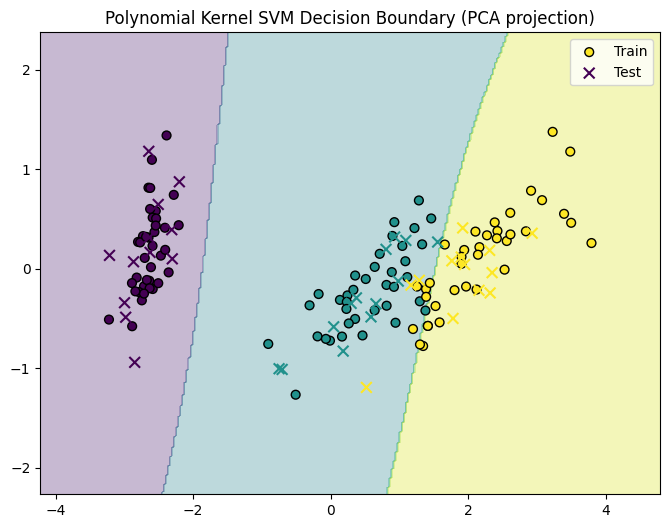

In [4]:
"""
24) Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary

->
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, random_state=42, stratify=y)
clf = SVC(kernel='poly', degree=3, C=1.0).fit(X_train, y_train)

x_min, x_max = X2[:,0].min() - 1, X2[:,0].max() + 1
y_min, y_max = X2[:,1].min() - 1, X2[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min,x_max,300), np.linspace(y_min,y_max,300))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='k', label='Train', s=40)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='x', label='Test', s=60)
plt.title("Polynomial Kernel SVM Decision Boundary (PCA projection)")
plt.legend()
plt.show()

In [5]:
"""
25) Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy

->
"""
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = datasets.load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
acc = accuracy_score(y_test, gnb.predict(X_test))
print("GaussianNB accuracy (Breast Cancer):", acc)

GaussianNB accuracy (Breast Cancer): 0.9385964912280702


In [6]:
"""
26) Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

->
"""
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

newsgroups = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'))
X, y = newsgroups.data, newsgroups.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

model = make_pipeline(TfidfVectorizer(stop_words='english', max_df=0.7), MultinomialNB())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MultinomialNB accuracy (20 Newsgroups):", accuracy_score(y_test, y_pred))

MultinomialNB accuracy (20 Newsgroups): 0.7272920203735145


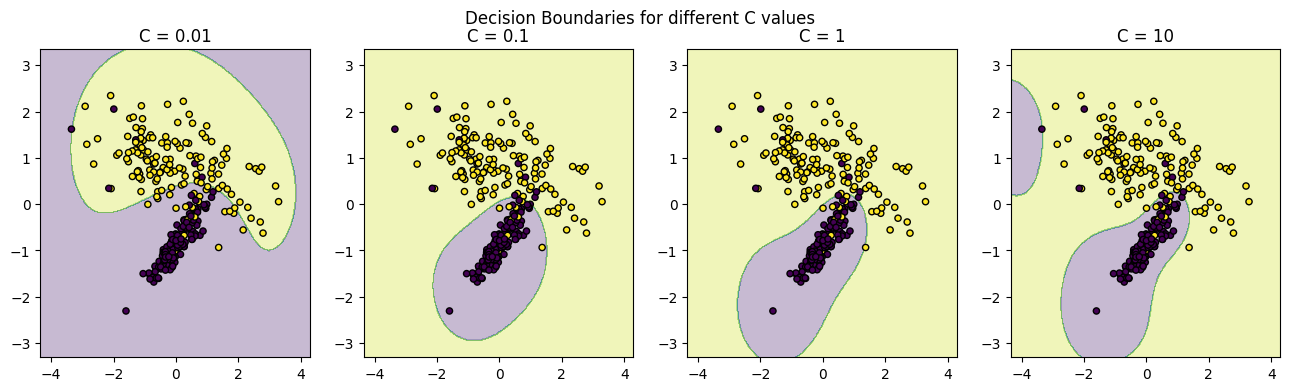

In [7]:
"""
27) Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually

->
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.05, class_sep=1.0, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

Cs = [0.01, 0.1, 1, 10]
fig, axes = plt.subplots(1,len(Cs), figsize=(16,4))
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300))

for ax, C in zip(axes, Cs):
    clf = SVC(kernel='rbf', C=C, gamma='scale').fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:,0], X[:,1], c=y, edgecolor='k', s=20)
    ax.set_title(f"C = {C}")
plt.suptitle("Decision Boundaries for different C values")
plt.show()

In [8]:
"""
28) Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features

->
"""
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X, y = make_classification(n_samples=800, n_features=20, n_informative=10, random_state=42)
thresholds = np.median(X, axis=0)
X_bin = (X > thresholds).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_bin, y, test_size=0.2, random_state=42, stratify=y)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
print("BernoulliNB accuracy (binary features):", accuracy_score(y_test, bnb.predict(X_test)))

BernoulliNB accuracy (binary features): 0.74375


In [9]:
"""
29) Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data

->
"""
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

clf_unscaled = SVC(kernel='rbf', gamma='scale', C=1.0).fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, clf_unscaled.predict(X_test))

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
clf_scaled = SVC(kernel='rbf', gamma='scale', C=1.0).fit(X_train_s, y_train)
acc_scaled = accuracy_score(y_test, clf_scaled.predict(X_test_s))

print("Unscaled SVM accuracy:", acc_unscaled)
print("Scaled SVM accuracy:  ", acc_scaled)

Unscaled SVM accuracy: 0.7111111111111111
Scaled SVM accuracy:   0.9777777777777777


In [10]:
"""
30) Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing

->
"""
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = datasets.load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

gnb_default = GaussianNB().fit(X_train, y_train)
pred_default = gnb_default.predict(X_test)
acc_default = accuracy_score(y_test, pred_default)

# var_smoothing acts like a small added variance (not Laplace but smoothing-like)
gnb_smoothed = GaussianNB(var_smoothing=1e-6).fit(X_train, y_train)
pred_smoothed = gnb_smoothed.predict(X_test)
acc_smoothed = accuracy_score(y_test, pred_smoothed)

print("Accuracy (default var_smoothing):", acc_default)
print("Accuracy (increased var_smoothing):", acc_smoothed)

Accuracy (default var_smoothing): 0.9370629370629371
Accuracy (increased var_smoothing): 0.9230769230769231


In [11]:
"""
31) Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)

->
"""
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

param_grid = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
gs = GridSearchCV(SVC(), param_grid, cv=4, n_jobs=-1)
gs.fit(X_train, y_train)
print("Best params:", gs.best_params_)
print("Test accuracy with best params:", accuracy_score(y_test, gs.predict(X_test)))

Best params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Test accuracy with best params: 1.0


In [12]:
"""
32) Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy

->
"""
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], n_features=20, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

clf_no_weight = SVC(kernel='rbf', C=1.0, random_state=42).fit(X_train, y_train)
clf_weighted = SVC(kernel='rbf', C=1.0, class_weight='balanced', random_state=42).fit(X_train, y_train)

print("Without class_weight:\n", classification_report(y_test, clf_no_weight.predict(X_test), zero_division=0))
print("With class_weight='balanced':\n", classification_report(y_test, clf_weighted.predict(X_test), zero_division=0))

Without class_weight:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       236
           1       1.00      0.29      0.44        14

    accuracy                           0.96       250
   macro avg       0.98      0.64      0.71       250
weighted avg       0.96      0.96      0.95       250

With class_weight='balanced':
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       236
           1       0.47      0.57      0.52        14

    accuracy                           0.94       250
   macro avg       0.72      0.77      0.74       250
weighted avg       0.95      0.94      0.94       250



In [13]:
"""
33) Write a Python program to implement a Naïve Bayes classifier for spam detection using email data

->
"""
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import make_pipeline

if os.path.exists('emails.csv'):
    df = pd.read_csv('emails.csv')  # expects 'text' and 'label' columns
    X = df['text'].astype(str)
    y = df['label']
else:
    # Proxy: use two categories as spam vs ham
    cats = ['talk.politics.misc', 'rec.sport.hockey']
    data = fetch_20newsgroups(subset='all', categories=cats, remove=('headers','footers','quotes'))
    X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
model = make_pipeline(TfidfVectorizer(stop_words='english', max_df=0.7), MultinomialNB())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Spam-detector (proxy) accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Spam-detector (proxy) accuracy: 0.954954954954955
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       250
           1       0.98      0.92      0.95       194

    accuracy                           0.95       444
   macro avg       0.96      0.95      0.95       444
weighted avg       0.96      0.95      0.95       444



In [14]:
"""
34) Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy

->
"""
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cats = ['alt.atheism', 'soc.religion.christian', 'comp.graphics']
data = fetch_20newsgroups(subset='all', categories=cats, remove=('headers','footers','quotes'))
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, random_state=42, stratify=data.target)

svm_pipe = make_pipeline(TfidfVectorizer(stop_words='english', max_df=0.7), SVC(kernel='linear', probability=False))
nb_pipe = make_pipeline(TfidfVectorizer(stop_words='english', max_df=0.7), MultinomialNB())

svm_pipe.fit(X_train, y_train)
nb_pipe.fit(X_train, y_train)

print("SVM accuracy:", accuracy_score(y_test, svm_pipe.predict(X_test)))
print("MultinomialNB accuracy:", accuracy_score(y_test, nb_pipe.predict(X_test)))

SVM accuracy: 0.8759018759018758
MultinomialNB accuracy: 0.8196248196248196


In [15]:
"""
35) Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results

->
"""
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

data = fetch_20newsgroups(subset='all', categories=['sci.space','rec.autos'], remove=('headers','footers','quotes'))
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, random_state=42, stratify=data.target)

baseline = make_pipeline(CountVectorizer(), MultinomialNB())
baseline.fit(X_train, y_train)
print("Baseline accuracy:", accuracy_score(y_test, baseline.predict(X_test)))

k = 2000
vec = CountVectorizer()
X_train_counts = vec.fit_transform(X_train)
X_test_counts = vec.transform(X_test)
selector = SelectKBest(chi2, k=min(k, X_train_counts.shape[1])).fit(X_train_counts, y_train)
X_train_sel = selector.transform(X_train_counts)
X_test_sel = selector.transform(X_test_counts)

clf = MultinomialNB().fit(X_train_sel, y_train)
print(f"Accuracy after SelectKBest (k={k}):", accuracy_score(y_test, clf.predict(X_test_sel)))

Baseline accuracy: 0.9292929292929293
Accuracy after SelectKBest (k=2000): 0.9151515151515152


In [16]:
"""
36) Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy

->
"""
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=42, stratify=wine.target)

ovr = OneVsRestClassifier(SVC(kernel='linear')).fit(X_train, y_train)
ovo = OneVsOneClassifier(SVC(kernel='linear')).fit(X_train, y_train)

print("OvR accuracy:", accuracy_score(y_test, ovr.predict(X_test)))
print("OvO accuracy:", accuracy_score(y_test, ovo.predict(X_test)))

OvR accuracy: 0.9555555555555556
OvO accuracy: 0.9555555555555556


In [17]:
"""
37) Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy

->
"""
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, random_state=42, stratify=data.target)

for kernel in ['linear', 'poly', 'rbf']:
    clf = SVC(kernel=kernel, degree=3 if kernel=='poly' else 3, random_state=42).fit(X_train, y_train)
    print(f"Kernel={kernel:6s} Accuracy: {accuracy_score(y_test, clf.predict(X_test)):.4f}")

Kernel=linear Accuracy: 0.9510
Kernel=poly   Accuracy: 0.9161
Kernel=rbf    Accuracy: 0.9231


In [18]:
"""
38) Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy

->
"""
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

iris = datasets.load_iris()
clf = SVC(kernel='rbf', C=1.0, gamma='scale')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, iris.data, iris.target, cv=cv, scoring='accuracy', n_jobs=-1)
print("Stratified K-Fold accuracies:", scores)
print("Average accuracy:", np.mean(scores))

Stratified K-Fold accuracies: [1.         0.96666667 0.93333333 1.         0.93333333]
Average accuracy: 0.9666666666666668


In [19]:
"""
39) Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance

->
"""
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=42, stratify=iris.target)

gnb_emp = GaussianNB().fit(X_train, y_train)
n_classes = len(set(y_train))
gnb_uniform = GaussianNB(priors=[1.0/n_classes]*n_classes).fit(X_train, y_train)

print("Accuracy (empirical priors):", accuracy_score(y_test, gnb_emp.predict(X_test)))
print("Accuracy (uniform priors):  ", accuracy_score(y_test, gnb_uniform.predict(X_test)))

Accuracy (empirical priors): 0.9210526315789473
Accuracy (uniform priors):   0.9210526315789473


In [20]:
"""
40) Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy

->
"""
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, random_state=42, stratify=data.target)

estimator = SVC(kernel='linear', C=1.0)
rfe = RFE(estimator, n_features_to_select=10, step=1).fit(X_train, y_train)
X_train_r = rfe.transform(X_train)
X_test_r = rfe.transform(X_test)

estimator.fit(X_train, y_train)
est_full = accuracy_score(y_test, estimator.predict(X_test))

estimator.fit(X_train_r, y_train)
est_rfe = accuracy_score(y_test, estimator.predict(X_test_r))

print("Accuracy (all features):", est_full)
print("Accuracy (RFE selected 10):", est_rfe)

Accuracy (all features): 0.951048951048951
Accuracy (RFE selected 10): 0.951048951048951


In [21]:
"""
41) Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy

->
"""
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

wine = datasets.load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=42, stratify=wine.target)

clf = SVC(kernel='linear').fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test), zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.90      1.00      0.95        18
           2       1.00      0.83      0.91        12

    accuracy                           0.96        45
   macro avg       0.97      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45



In [22]:
"""
42) Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)

->
"""
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.pipeline import make_pipeline

data = fetch_20newsgroups(subset='all', categories=['rec.sport.baseball','rec.sport.hockey','sci.space'], remove=('headers','footers','quotes'))
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, random_state=42, stratify=data.target)

pipe = make_pipeline(CountVectorizer(), MultinomialNB())
pipe.fit(X_train, y_train)
y_proba = pipe.predict_proba(X_test)
print("Log loss:", log_loss(y_test, y_proba))

Log loss: 0.5423464417786887


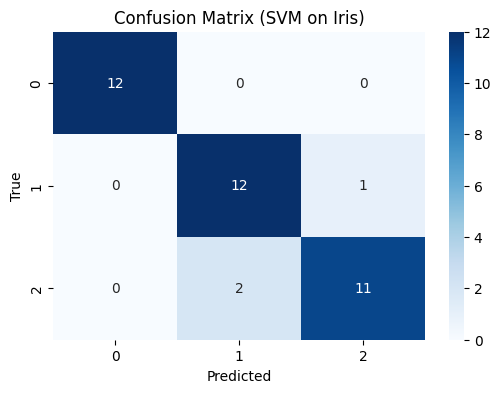

In [23]:
"""
43) Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn

->
"""
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=42, stratify=iris.target)
clf = SVC(kernel='rbf').fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix (SVM on Iris)')
plt.show()

In [24]:
"""
44) Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE

->
"""
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=10, gamma='scale').fit(X_train_s, y_train)
y_pred = svr.predict(X_test_s)
print("SVR MAE:", mean_absolute_error(y_test, y_pred))

SVR MAE: 0.377444369292191


In [25]:
"""
45) Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score

->
"""
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, random_state=42, stratify=data.target)
gnb = GaussianNB().fit(X_train, y_train)
y_proba = gnb.predict_proba(X_test)[:,1]
print("ROC-AUC (GaussianNB, Breast Cancer):", roc_auc_score(y_test, y_proba))

ROC-AUC (GaussianNB, Breast Cancer): 0.9893081761006289


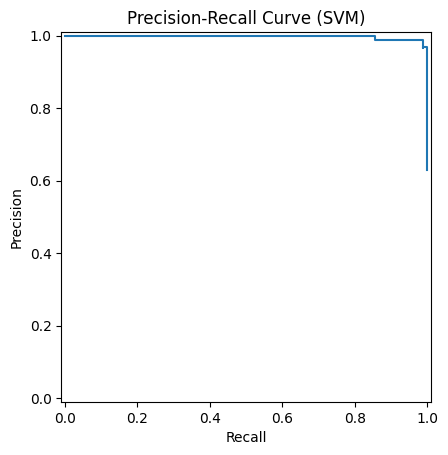

In [26]:
"""
46) Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve

->
"""
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.preprocessing import StandardScaler

data = datasets.load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

clf = SVC(kernel='rbf', probability=True).fit(X_train_s, y_train)
y_scores = clf.predict_proba(X_test_s)[:,1]

prec, rec, _ = precision_recall_curve(y_test, y_scores)
disp = PrecisionRecallDisplay(precision=prec, recall=rec)
disp.plot()
plt.title("Precision-Recall Curve (SVM)")
plt.show()